# IU 4.6 - Machine Learning Classification modelling

### 	The dataset is about car evaluation, features about car and a final decision of acceptance is captured here

We are required to select important features, split data into train and test, create a RandomForest classification model and get the evaluation metrics

#### Import packages

In [7]:
# import all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read datasets

In [8]:
# read the dataset
df = pd.read_csv("./Data/car_evaluation.csv")

# print the shape of dataset
print(df.shape)

# print the top rows of data
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
# summarize dataset using describe method
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,high,high,3,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [11]:
# explore the outcome variable "class"
df["class"].value_counts()

unacc    1210
acc       518
Name: class, dtype: int64

#### Declare feature vector and target variable into variables X and y

In [12]:
# drop column 'class' from df and assign it to X (use axis=1)
X = df.drop(['class'], axis=1)

# assign 'class' column from df to variable y
y = df['class']

#### Split data into separate training and test set

In [13]:
# split data into training and testing sets
# import required library
from sklearn.model_selection import train_test_split

# use the function to make the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# print the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

#### Feature Engineering

In [15]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [16]:
# encode categorical variables
# import category encoders
try:
    import category_encoders as ce
except:
    !pip install category_encoders
    import category_encoders as ce

# encode categorical variable with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

# fit and transform using fit_transform on the encoder object using X_train data
# assign it back to X_train
X_train = encoder.fit_transform(X_train)

# use encoder.transform on X_test and assign it to X_test
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [18]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


#### RandomForest classifier model with default parameters

In [19]:
# import RandomFroest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# predict the test set results
y_pred = rfc.predict(X_test)

# check accuracy score
from sklearn.metrics import accuracy_score

print('Model acuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model acuracy score with 100 decision-trees : 0.9825


#### RandomForest classifier model with parameter n_estimators=200

In [20]:
# instantiate the classifier with n_estimators = 200
rfc_100 = RandomForestClassifier(n_estimators=200, random_state=0)


# fit the model to the training set
rfc_100.fit(X_train, y_train)


# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)


# Check accuracy score 
print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 200 decision-trees : 0.9807


#### Find important featuers with RandomForest model

In [21]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [22]:
# view the feature scores
# create a pandas series using the clf.featuer_importances_
# assign index using column names
# sort values by descending
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# print the feature_scores
feature_scores

safety      0.332698
persons     0.293187
buying      0.128798
maint       0.115616
lug_boot    0.072239
doors       0.057461
dtype: float64

#### Visualize feature scores of the features

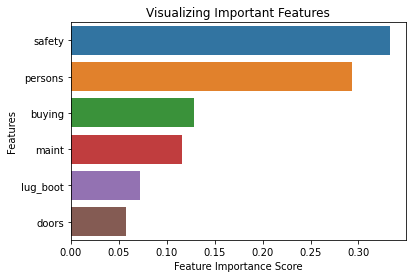

In [23]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')


# Add title to the graph
plt.title("Visualizing Important Features")


# Visualize the graph
plt.show()

#### Build RandomForest model on selected features

In [24]:
# declare feature vector and target variable
# drop columns class and doors from df and assign it to X (use axis=1)
X = df.drop(['class', 'doors'], axis=1)
# assign 'class' column to y
y = df['class']

In [25]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

# assign the output of train_test_split of X and y to X_train, X_test, y_train, y_test
# use test_size = 0.33
# use random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [26]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

# fit and transform using fit_transform on the encoder object using X_train data
# assign it back to X_train
X_train = encoder.fit_transform(X_train)

# use encoder.transform on X_test and assign it to X_test
X_test = encoder.transform(X_test)

In [27]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)


# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9685


## Model Evaluation Metrics

### Confusion matrix

<b> A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. </b>

<br>

Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.
Lets assume we have a binary classification problem. We have some samples belonging to two classes : YES or NO. Also, we have our own classifier which predicts a class for a given input sample. On testing our model, we get the following result.
<br><img src="https://i.ytimg.com/vi/AOIkPnKu0YA/maxresdefault.jpg" /><br>
There are 4 important terms : <br> <br>
<b> True Positives </b> : The cases in which we predicted YES and the actual output was also YES. <br>
<b> True Negatives </b> : The cases in which we predicted NO and the actual output was NO. <br>
<b> False Positives </b>: The cases in which we predicted YES and the actual output was NO. <br>
<b> False Negatives </b>: The cases in which we predicted NO and the actual output was YES. <br>

In [28]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

# use confusion_matrix function and store results in a variable cm
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[166   8]
 [ 10 387]]


### Classification Accuracy


Accuracy in classification problems is the number of correct predictions made by the model over all kinds predictions made.

<img src="https://cdn-images-1.medium.com/max/1600/1*5XuZ_86Rfce3qyLt7XMlhw.png"/>

In [31]:
accuracy_score(y_test, y_pred)

0.968476357267951

When to use Accuracy:

Accuracy is a good measure when the target variable classes in the data are nearly balanced. example Survived(60% yes - 40% no)  


### Precision

Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.
Precision is about being precise

<img src="https://cdn-images-1.medium.com/max/640/1*KhlD7Js9leo0B0zfsIfAIA.png" />

### Recall

When it is actually the positive result, how often does it predict correctly

<img src="https://cdn-images-1.medium.com/max/640/1*a8hkMGVHg3fl4kDmSIDY_A.png" />

### F1 Score

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, <b style="color:red">especially if you have an uneven class distribution</b>

<img src="https://cdn-images-1.medium.com/max/1600/1*UJxVqLnbSj42eRhasKeLOA.png">

#### Classification report

In [32]:
# import classification_report 
from sklearn.metrics import classification_report

# print the classification_report for y_test and y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.95      0.95       174
       unacc       0.98      0.97      0.98       397

    accuracy                           0.97       571
   macro avg       0.96      0.96      0.96       571
weighted avg       0.97      0.97      0.97       571



### AUC - ROC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR .

<img src="https://cdn-images-1.medium.com/max/1600/1*pk05QGzoWhCgRiiFbz-oKQ.png">

ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests.

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

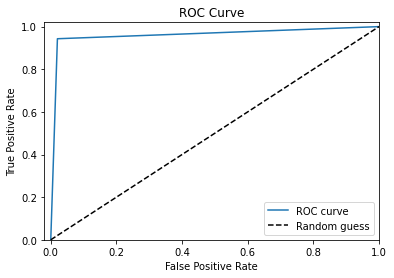

In [44]:
y_test_bin = np.where(y_test == "unacc", 0, 1)
y_pred_bin = np.where(y_pred == "unacc", 0, 1)

fpr, tpr, thresholds = roc_curve(y_pred_bin, y_test_bin)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

<b> True Positive Rate (Sensitivity) </b> : True Positive Rate is defined as <b style="color:red"> TP/ (FN+TP) </b>. True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.

<b> True Negative Rate (Specificity) </b> : True Negative Rate is defined as <b style="color:red"> TN / (FP+TN) </b>. False Positive Rate corresponds to the proportion of negative data points that are correctly considered as negative, with respect to all negative data points.

<b> False Positive Rate </b>: False Positive Rate is defined as <b style="color:red"> FP / (FP+TN) </b>. False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.

<b> False Positive Rate and True Positive Rate both have values in the range [0, 1]. FPR and TPR both are computed at varying threshold values such as (0.00, 0.02, 0.04, …., 1.00) and a graph is drawn. AUC is the area under the curve of plot False Positive Rate vs True Positive Rate at different points in [0, 1]. </b>

### Nuances in Model Evaluation

#### 1. Accuracy vs ROC AUC 

The first big difference is that you calculate <b> accuracy on the predicted classes </b> while you calculate <b> ROC AUC on predicted scores </b>. That means you will have to find the optimal threshold for your problem.

Moreover, <b> accuracy </b> looks at fractions of <b> correctly assigned positive and negative classes</b>. That means <b> if our problem is highly imbalanced </b> we get a <b> really high accuracy score </b> by simply predicting that <b> all observations belong to the majority class. </b> 

<b  style="color:blue"> On the flip side, if your problem is balanced and you care about both positive and negative predictions, accuracy is a good choice </b> because it is really simple and easy to interpret.

<b style="color:blue"> ROC AUC is especially good at ranking predictions </b>. Because of that, if you have a problem where sorting your observations is what you care about ROC AUC is likely what you are looking for.

#### 2. F1 score vs Accuracy

Both of those metrics take class predictions as input so you will have to adjust the threshold regardless of which one you choose.

Remember that <b> F1 score </b>is balancing precision and recall on the <b> positive class </b> while <b> accuracy </b> looks at correctly classified observations both <b> positive and negative. </b> That makes a <b> big difference </b> especially for the <b> imbalanced problems </b> where by default our model will be good at predicting true negatives and hence accuracy will be high. <b style="color:blue"> However, if you care equally about true negatives and true positives then accuracy is the metric you should choose. </b>

#### 3. F1 score vs ROC AUC

<b> One big difference between F1 score and ROC AUC is that the first one takes predicted classes and the second takes predicted scores as input </b>. Because of that, <b> with F1 score you need to choose a threshold </b> that assigns your observations to those classes. Often, you can improve your model performance by a lot if you choose it well.

So, <b> if you care about ranking predictions, don’t need them to be properly calibrated probabilities, and your dataset is not heavily imbalanced then I would go with ROC AUC. </b> 

<b style="color:blue"> If your dataset is heavily imbalanced </b> and/or you mostly care about the positive class, I’d consider using <b style="color:blue"> F1 score, or Precision-Recall AUC-ROC Curve.</b> The additional reason to go with F1 (or Fbeta) is that these metrics are <b style="color:blue"> easier to interpret and communicate to business stakeholders. <b> 